# Predicting Heart Disease Using Machine learning Model

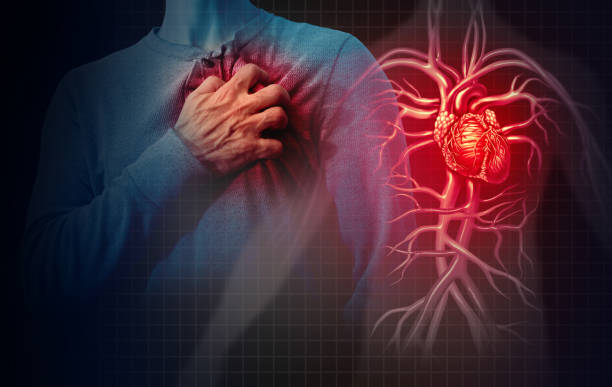

# What Causes Heart Disease?

#### A heart attack happens when blood supply to the heart becomes significantly reduced or obstructed. The obstruction is typically caused by a buildup of fat, cholesterol, and other chemicals in the arteries leading to the heart (coronary). Plaques are the name given to these cholesterol- and fatty-rich formations. Atherosclerosis describes the process of plaque accumulation.

#### A plaque can rupture and generate a clot, which can obstruct blood flow. Part of the heart muscle might become damaged or even die if there is not enough blood flow.

#### A heart attack is sometimes referred to as a myocardial infarction.

## About the Data Set

#### The offered data includes a table of patient data that includes age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, CK-MB, and troponin values. 1312 patients with chest discomfort were treated at the hospital and provided with the data. In order to diagnose heart attacks, doctors need the data.
#### Individual patients are represented by the rows. The information for each patient is listed in the same order, from left to right.
#### The data is an important resource for clinicians since it can aid in the diagnosis and treatment of heart attacks. The information is also useful in the study of cardiac attacks. The information will help researchers better understand the causes, signs, and treatments of heart attacks.

## Table of Contents

##### 1) Importing Libraries
##### 2) EDA
##### 3) Model Preparation
##### 4) Descriptive Statistics
##### 5) Machine Learning Models
##### 6) Comparison of Different Machine Learning Models
##### 7) Discussion
##### 8) Conclusion
##### 9) References

## Importing Libraries

#### We're importing Numpy, pandas, matplotlib, and seaborn. Numpy is used to perform a variety of mathematical operations. Pandas provides access to many functions for performing data analysis. Matplotlib is used for visualisation, and Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.svm import SVC

## Loading csv dataset

In [2]:
data = pd.read_csv('Medicaldataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


## Number of Rows and Columns

In [4]:
#Number of rows and columns
data.shape

(1319, 9)

## Verifying the missing Values

In [5]:
#Checking for missing values
data.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

## EDA

### Target Variable

In [6]:
#Finding the Values
data['Result'].value_counts()

#from the output we can see that 165 people are having the number of heart diseases

positive    810
negative    509
Name: Result, dtype: int64

## Correlation Matrix

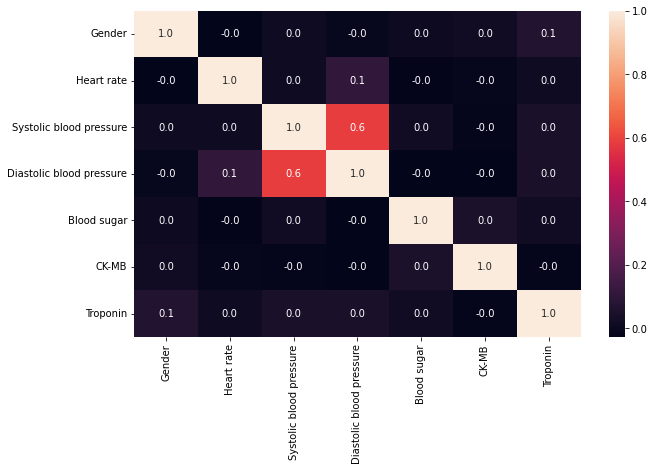

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop('Age',axis=1).corr(),annot=True,fmt="1.1f");

## Gender distribution

#### The percentage distribution of gender is depicted in a pie chart. According to the graph, 34% of the population are female and 66% are men.

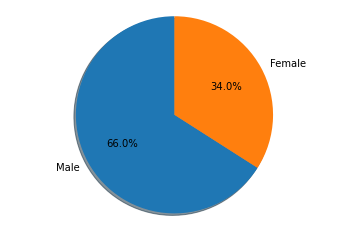

In [8]:
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(data.Gender.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Barplot of Result shown with Gender

#### Male and female are shown in two separate colours in the plot below, and we have code for them, which is 1 for male and 0 for female. Comparing men and women, the graph shows that more males suffer from heart disease.
 

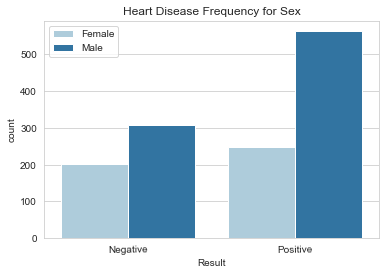

In [26]:
fig = sns.countplot(x = 'Result', data = data, hue = 'Gender', palette='Paired')
fig.set_xticklabels(labels=["Negative", 'Positive'], rotation=1)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

## Model Preparation

In [10]:
#Splitting the Features and target
X= data.drop(columns="Result",axis=1)  # X will be storing all the variables except the Result one 
Y=data["Result"]  # Y will be storing only the Result variable 
print(X)
print(Y)

      Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  
0                           83        160.0   1.80     0.012  
1                           46        296.0   6.75     1.060  
2                           77        270.0   1.99     0.003  
3                           55        270.0  13.87 

## Descriptive Statistics

#### The summaries of the data for each column display the mean, standard deviation, minimum value, 25th percentile, 50th percentile (median), 75th percentile, and maximum value. As an illustration, the dataset's patient population has a mean age of 52.09 years, a standard deviation of 13.73 years, a range of ages from 14 years old to 91 years old. The 25th percentile age is 63 years, the median age is 52 years, and the maximum age is 91 years.

In [11]:
data[data['Result']=='negative'].describe().T.style.background_gradient(subset=['mean','std','50%','75%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,509.000000,52.094303,13.730783,14.000000,42.000000,52.000000,63.000000,91.000000
Gender,509.000000,0.603143,0.489727,0.000000,0.000000,1.000000,1.000000,1.000000
Heart rate,509.000000,77.886051,48.211096,20.000000,64.000000,75.000000,84.000000,1111.000000
Systolic blood pressure,509.000000,127.856582,27.037031,42.000000,110.000000,125.000000,147.000000,223.000000
Diastolic blood pressure,509.000000,72.440079,14.325479,40.000000,61.000000,72.000000,82.000000,128.000000
Blood sugar,509.000000,149.757760,78.407363,60.000000,98.000000,117.000000,184.000000,541.000000
CK-MB,509.000000,2.555344,1.367549,0.321000,1.500000,2.310000,3.350000,7.020000
Troponin,509.000000,0.026988,0.443320,0.001000,0.003000,0.006000,0.009000,10.000000


#### Each column's summarising statistics include the mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values. The patients in the sample, for instance, had a mean age of 58.76 years and an SD of 12.95 years. The age ranges from 19 years old to 103 years old.


#### To identify heart attacks, doctors use the CK-MB and troponin levels as biomarkers. Both troponin and CK-MB are proteins that are released from the cardiac muscle when it is injured. Usually, patients who have suffered a heart attack have higher levels of these biomarkers.


In [12]:
data[data['Result']=='positive'].describe().T.style.background_gradient(subset=['mean','std','50%','75%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,810.000000,58.766667,12.955419,19.000000,50.000000,60.000000,68.000000,103.000000
Gender,810.000000,0.695062,0.460666,0.000000,0.000000,1.000000,1.000000,1.000000
Heart rate,810.000000,78.619753,53.694817,20.000000,64.000000,74.000000,85.750000,1111.000000
Systolic blood pressure,810.000000,126.739506,25.538938,65.000000,110.000000,122.000000,140.750000,223.000000
Diastolic blood pressure,810.000000,72.161728,13.855417,38.000000,62.000000,71.000000,80.000000,154.000000
Blood sugar,810.000000,144.671605,72.628716,35.000000,98.000000,116.000000,166.000000,541.000000
CK-MB,810.000000,23.266838,57.702774,0.353000,1.870000,3.775000,12.250000,300.000000
Troponin,810.000000,0.570798,1.390704,0.003000,0.016000,0.044000,0.456250,10.300000


## Spillting the dataset into Train and Test

In [13]:
#Splitting the Data into Training data & Test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(1319, 8) (1055, 8) (264, 8)


## Logistic Regression

#### Logistic regression is a sort of statistical regression analysis that predicts the outcome of a categorical dependent variable using a collection of predictor or independent variables. The dependant variable is always binary in logistic regression. Logistic regression is mostly used for prediction as well as determining the chance of success.

In [15]:
modelLogistic = LogisticRegression(max_iter=1000)
result = modelLogistic.fit(X_train,Y_train)
print("Test Accuracy {:.2f}%".format(modelLogistic.score(X_train,Y_train)*100))

Test Accuracy 79.91%


## Random Forest
#### Random Forest is a tree-based machine learning technique that makes judgements by utilising the advantages of many decision trees. Each tree in the random forest generates a class prediction, and the class with the most votes becomes the prediction of our model. Any of the individual constituent models will outperform a large number of reasonably uncorrelated models (trees) acting as a committee.
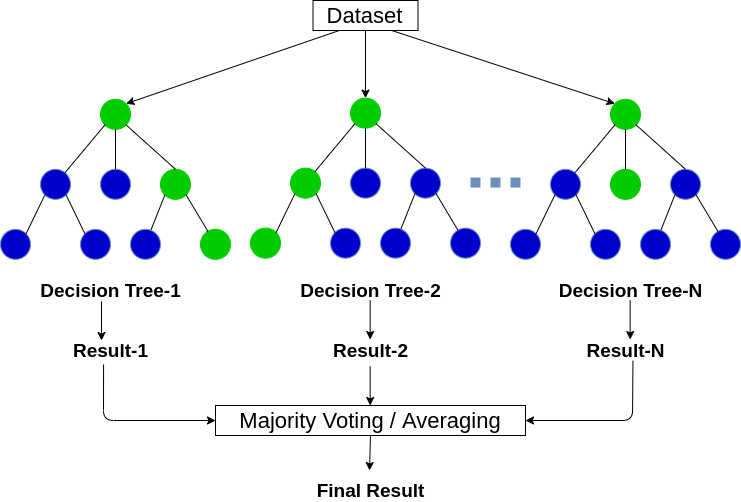

In [16]:
randomForestAlgorithm =RandomForestClassifier(n_estimators = 100) 

In [17]:
randomForestAlgorithm.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
randomForestAlgorithmScore=randomForestAlgorithm.predict(X_test)

## Random Forest Accuracy

In [19]:
randomForestAlgorithmAccuracy=print( metrics.accuracy_score(Y_test, randomForestAlgorithmScore)*100)

99.24242424242425


## Gaussian Navie 
#### Naive Bayes Classifiers are based on the Bayes Theorem, with one assumption being the strong independence assumptions between features. These classifiers make the assumption that the value of one feature is unrelated to the value of any other characteristic. Naive Bayes Classifiers are taught relatively efficiently in supervised learning situations. Naive Bayes classifiers require a small amount of training data to estimate the classification parameters. Naive Bayes Classifiers have a simple design and implementation and may be used to a wide range of real-world situations.
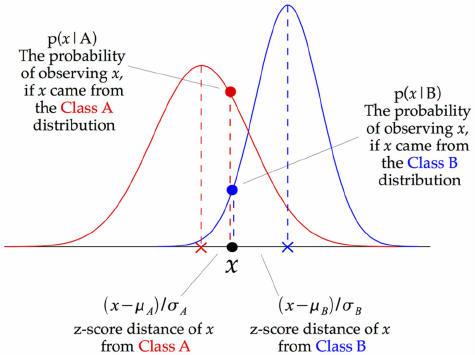

In [20]:
gaussianNavieModel = GaussianNB(var_smoothing=0.1)
gaussianNavieModel.fit(X_train, Y_train)

gaussianNavieModelPredict = gaussianNavieModel.predict(X_test)

## Gaussian Navie Model Accuracy

In [21]:
# --- GNB Accuracy ---
gaussianNavieModelScore = accuracy_score(gaussianNavieModelPredict, Y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(gaussianNavieModelScore*100)+' .:.')

.:. Gaussian Naive Bayes Accuracy: 49.24% .:.


## Decision Tree
#### The Decision Tree is a Supervised learning technique that may be used to solve both classification and regression issues, but it is most commonly employed to solve classification problems. It is a tree-structured classifier, with core nodes representing dataset attributes, branches representing decision rules, and leaf nodes representing outcomes.
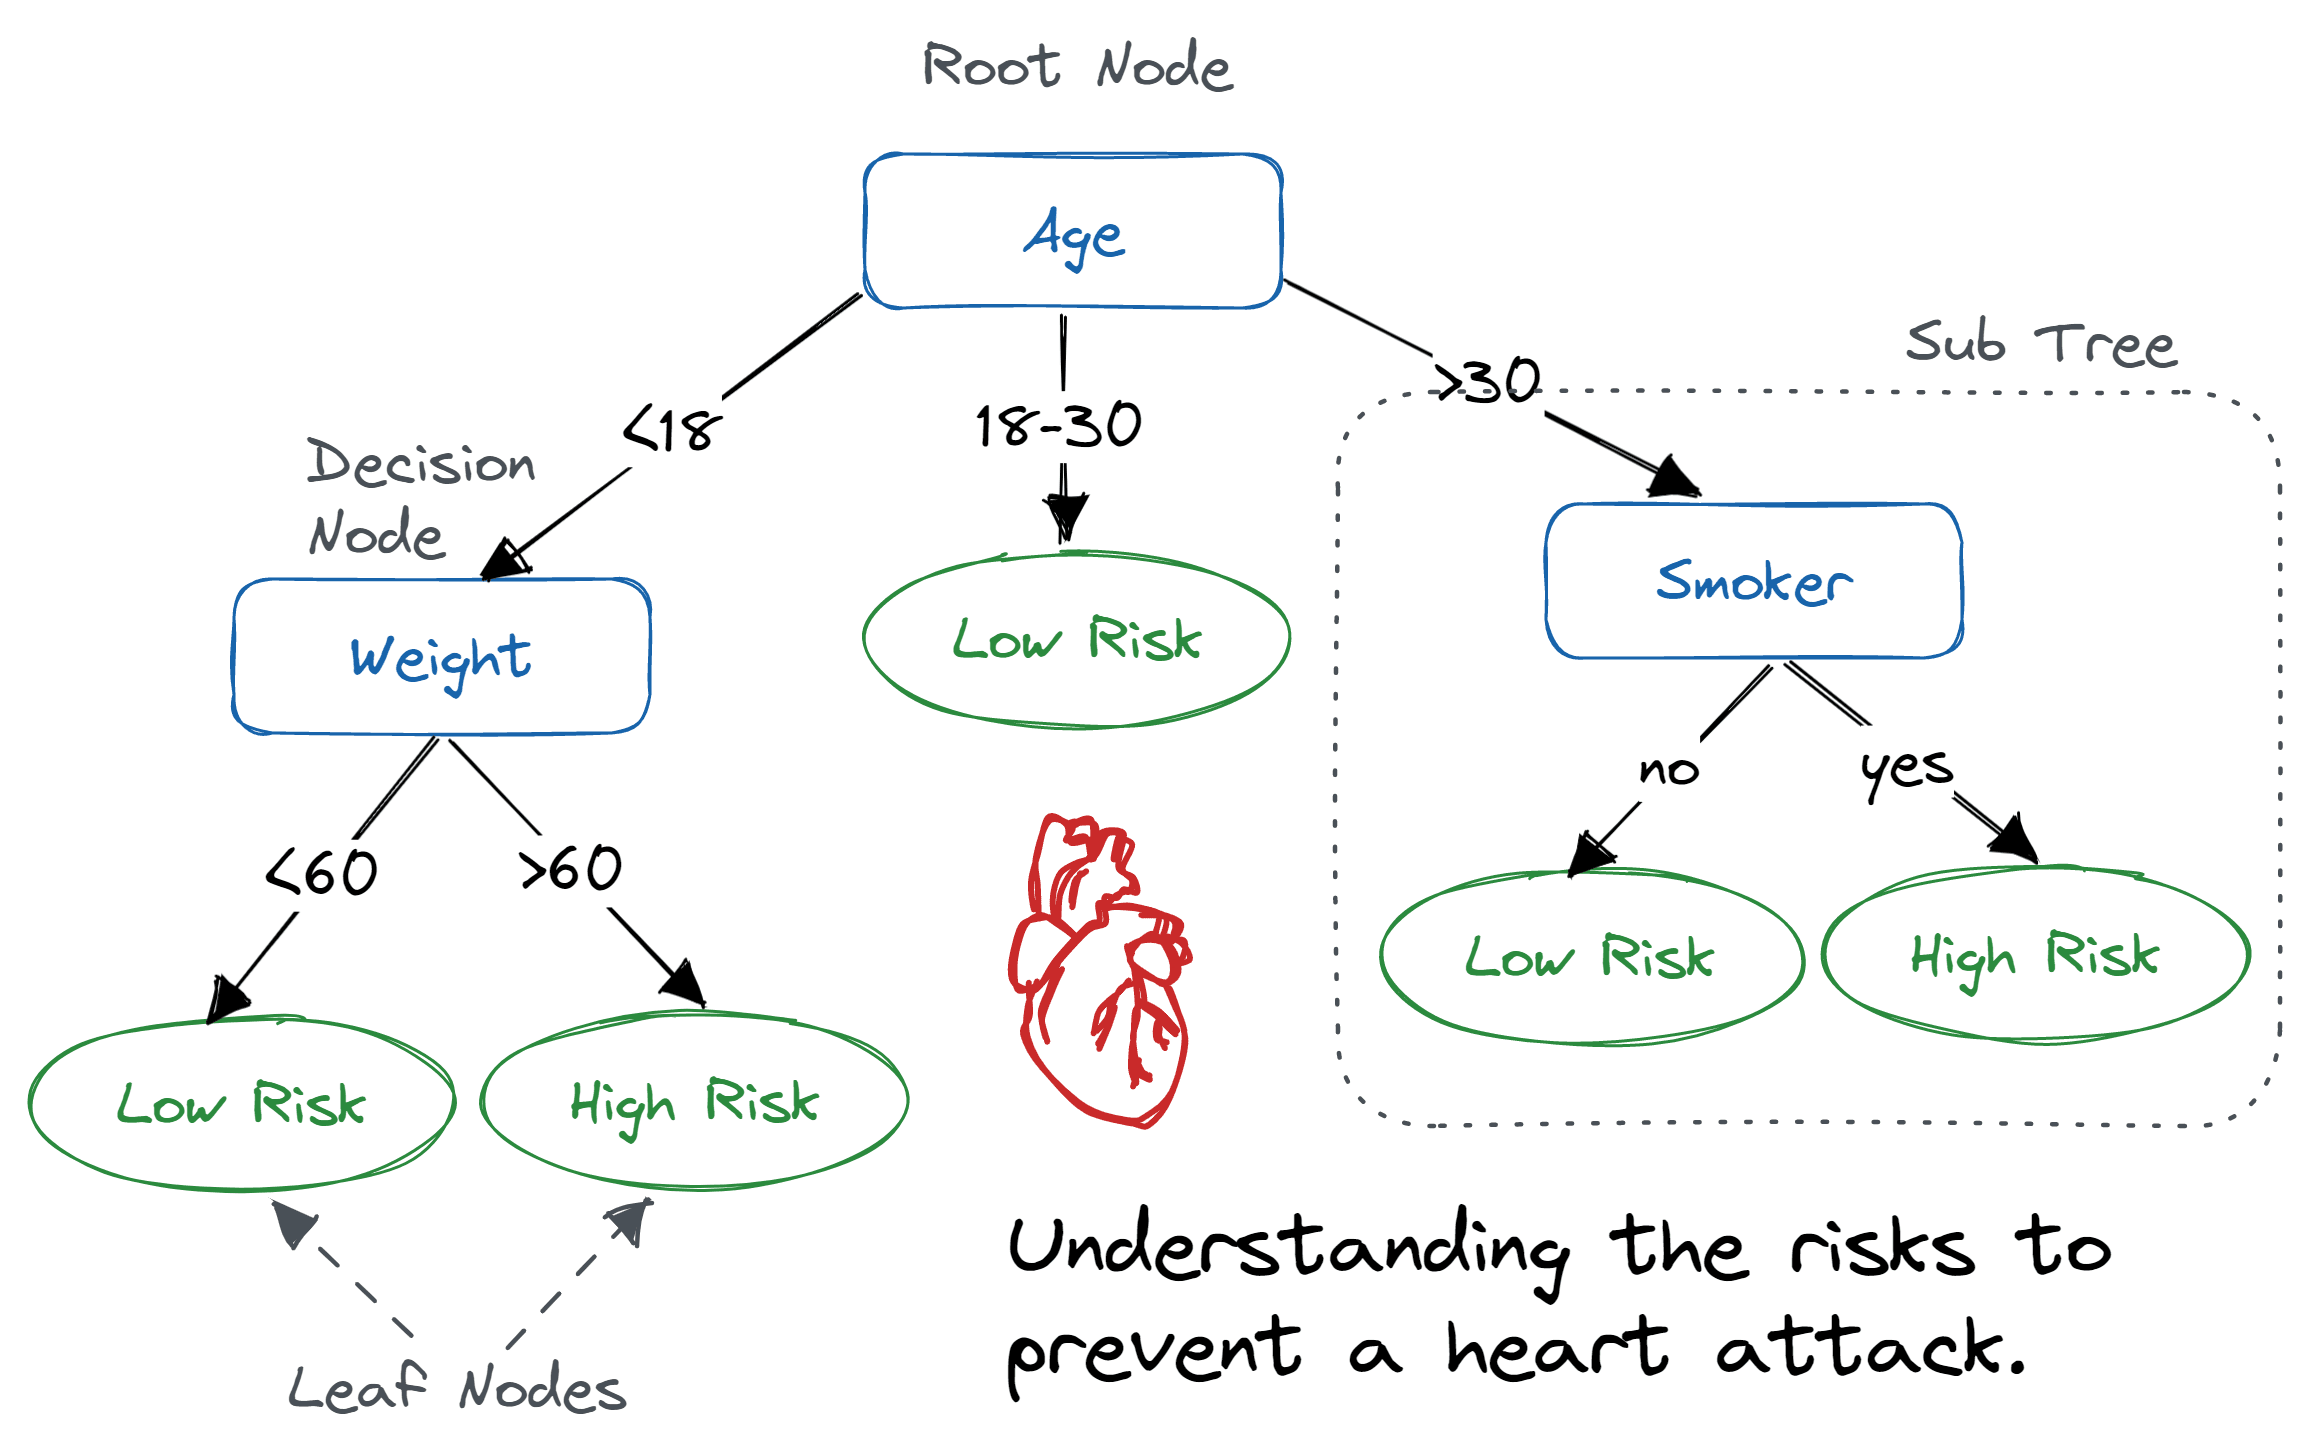

In [22]:
from sklearn.tree import DecisionTreeClassifier
descisionTreeAlgo = DecisionTreeClassifier()
descisionTreeAlgo.fit(X_train, Y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(descisionTreeAlgo.score(X_test, Y_test)*100))

Decision Tree Test Accuracy 98.86%


## Support Vector Machine Model

#### The Support Vector Machine (SVM) is a common Supervised Learning technique for Classification and Regression issues.
#### The SVM algorithm's purpose is to find the optimal line or decision boundary for classifying n-dimensional space so that we may simply place fresh data points in the correct category in the future. A hyperplane is the optimal choice boundary.

#### SVM selects extreme points/vectors to aid in the creation of the hyperplane. These extreme examples are referred to as support vectors, and as a result, the method is known as the Support Vector Machine.
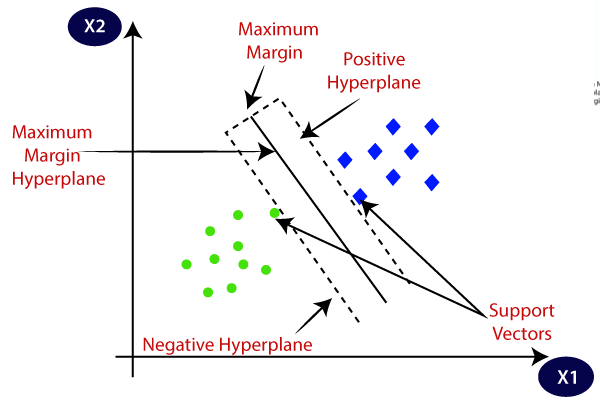

In [23]:
SupportVectorMachineModel = SVC()
SupportVectorMachineModel.fit(X_train, Y_train)
SupportVectorMachineModelScore=SupportVectorMachineModel.score(X_train, Y_train)
SupportVectorMachineModelScore

0.6834123222748815

## Comparision of Differents Model 
#### Comparing all of the models and showing them in a Barplot, as seen below.

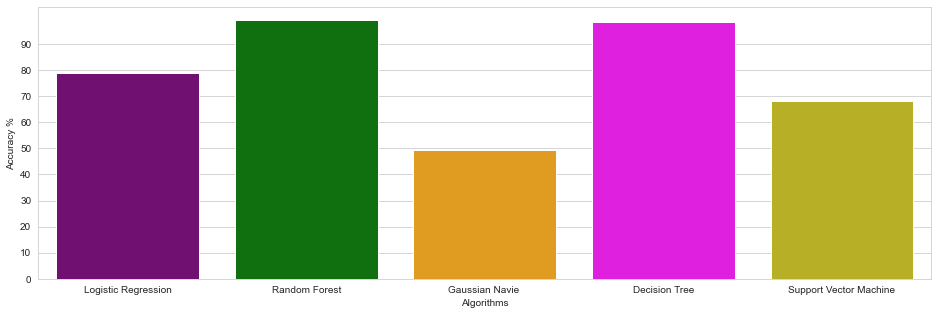

In [24]:
methods = ["Logistic Regression", "Random Forest","Gaussian Navie ", "Decision Tree", "Support Vector Machine"]
accuracy = [78.79, 99.24, 49.24, 98.48, 68.34]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

## Confusion Matrix

#### A table that displays a categorization model's effectiveness is called a confusion matrix. A breakdown of the model's true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) is shown in the table.The confusion matrices reveal that all of the models can accurately categorise the majority of the test set patients. Although the models appear to be performing well, some of the predictions contain inaccuracies. The projections do contain a few mistakes, though. The decision tree classifier and random forest classifier both appear to perform most effectively. The performance of the Gaussian naive Bayes classifier is the worst, followed by that of the logistic regression and support vector machine classifiers.


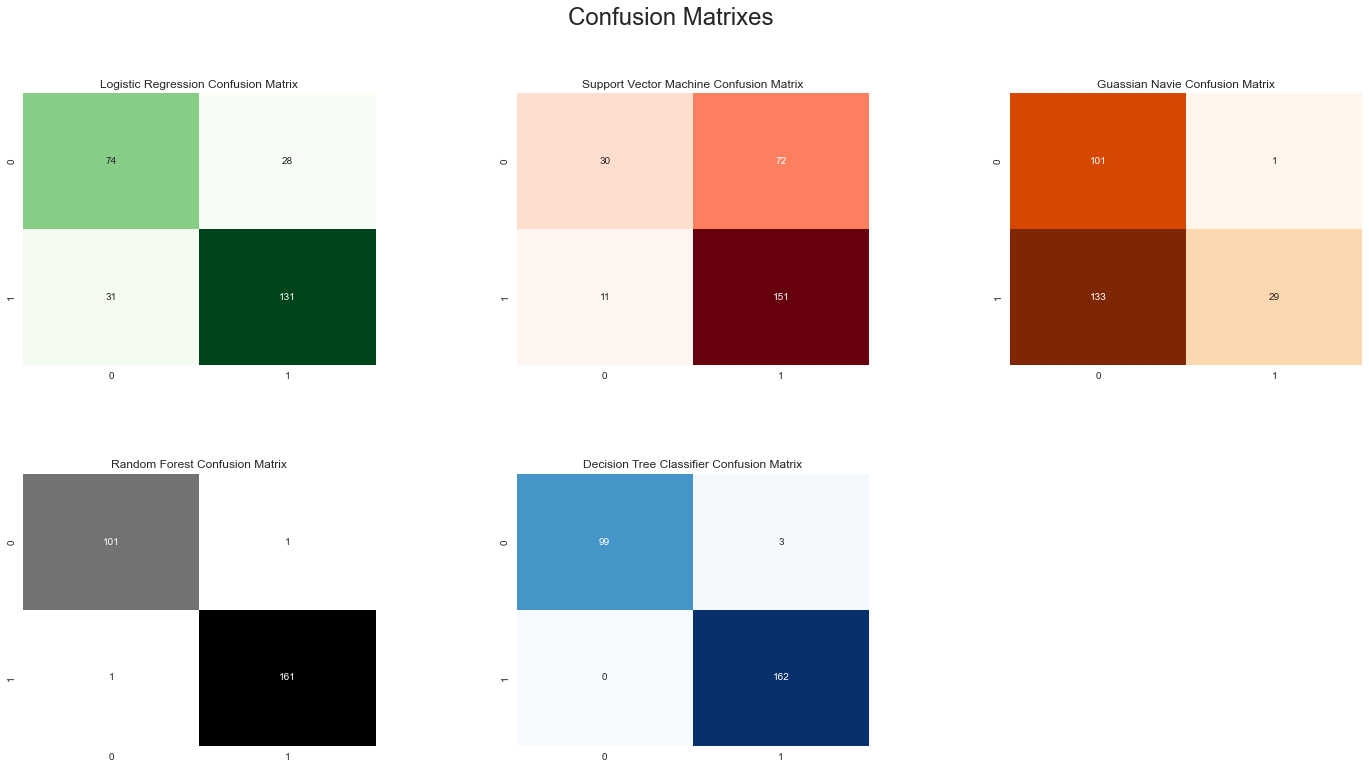

In [25]:
# Predicted values
logisticPredict = modelLogistic.predict(X_test)
supportVectorMachinePredict = SupportVectorMachineModel.predict(X_test)
guassianNaviePredict = gaussianNavieModel.predict(X_test)
descisionTreePredict = descisionTreeAlgo.predict(X_test)
randomForestPredict = randomForestAlgorithm.predict(X_test)


from sklearn.metrics import confusion_matrix
logistic = confusion_matrix(Y_test,logisticPredict)
supportVector = confusion_matrix(Y_test,supportVectorMachinePredict)
guassianNavie = confusion_matrix(Y_test,guassianNaviePredict)
randomForest = confusion_matrix(Y_test,randomForestPredict)
descisionTree = confusion_matrix(Y_test,descisionTreePredict)


plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(logistic,annot=True,cmap="Greens",fmt="d",cbar=False)
plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(supportVector,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.subplot(2,3,3)
plt.title("Guassian Navie Confusion Matrix")
sns.heatmap(guassianNavie,annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.subplot(2,3,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(randomForest,annot=True,cmap="Greys",fmt="d",cbar=False)
plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(descisionTree,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()


## Conclusion

#### A dataset was generated to predict cardiac attacks. Information on 1312 patients who had hospital treatment for chest pain is included in the dataset. Age, gender, blood pressure, blood sugar, heart rate, CK-MB, and troponin levels are all included in the patient data. Four machine learning models were trained using the data: support vector machine, logistic regression, random forest, and Gaussian naive bayes.

#### According to the confusion matrices, the majority of the patients in the test set could be classified correctly by all four models. The most accurate classifiers were the decision tree classifier and random forest classifier, with accuracies of 99.26% and 98.48%, respectively. The Gaussian naive Bayes classifier has the lowest accuracy, at 49.24%.


## References

#### https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106
#### https://medium.com/@cdabakoglu/heart-disease-logistic-regression-machine-learning-d0ebf08e55c0
#### https://www.ijraset.com/research-paper/heart-disease-prediction-using-logistic-regression-algorithm
#### https://www.kaggle.com/code/akashkotal/heart-disease-eda-with-7-machine-learning-model#Model-Implementation-%F0%9F%9B%A0
#### https://www.kaggle.com/code/adilashrafi/heart-disease-prediction-89-89